In [1]:
#%matplotlib notebook

In [5]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [6]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = []

# Code Here
for i in range(nsamples):
    samples.append(housing_data['MEDV'].sample(20))
    
samples[0]

9957     3.61100
3079     0.82500
2227     1.93500
7995     2.17300
9085     1.40300
7356     1.87500
20605    0.61200
17477    4.25000
11507    4.22200
9696     1.30500
10864    1.85200
8796     5.00001
8274     2.25000
5523     3.16000
14697    1.70000
13479    0.88100
20192    0.55000
14851    1.18200
15641    4.58300
12003    1.37600
Name: MEDV, dtype: float64

In [26]:
# Calculate means
means = [sample.mean() for sample in samples]
# Calculate standard error on means
errors = [sem(sample) for sample in samples]

Text(0, 0.5, 'Mean of Median House Prices ($100,000)')

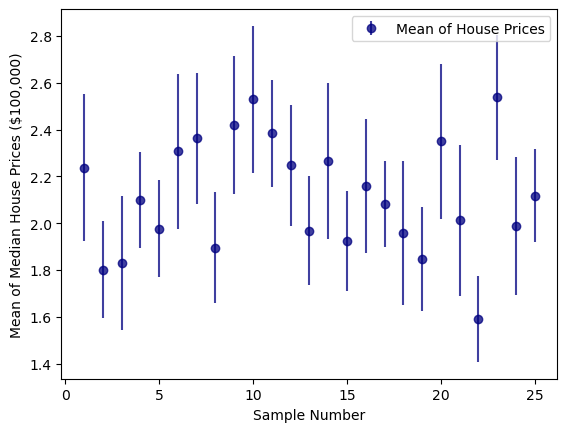

In [35]:
# Plot sample means with error bars
x = np.arange(len(samples)) + 1
plt.errorbar(x, means, errors,
             fmt='o',
             alpha=0.75,
             c='navy',
             label='Mean of House Prices')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean of Median House Prices ($100,000)')

In [41]:
# Calculate the range of SEM values
print(f'The range of SEMs is {max(means) - min(means)}.')

The range of SEMs is 0.9459509999999993.


In [44]:
# Determine which sample's mean is closest to the population mean
print(f'The smallest SEM observed was {min(errors)}')
small_i = errors.index(min(errors))
print(f'The sample with the smallest SEM is sample {small_i + 1}.')

The smallest SEM observed was 0.18224056397491403
The sample with the smallest SEM is sample 17.


In [47]:
# Compare to the population mean
print(f'The mean of sample {small_i + 1} is {means[small_i]}.')

print(f'The mean the population data set is {housing_data["MEDV"].mean()}.')

The mean of sample 17 is 2.0824000000000003.
The mean the population data set is 2.068558169089147.
